# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
-0.002
-0.004
-0.002
0.0
-0.003
-0.005
-0.003
0.969
0.973
0.973
0.971
1.974
1.974
1.973
1.973
2.958
2.958
2.957
2.957
3.932
3.931
3.93
3.93
4.907
4.906
4.904
4.902
5.91
5.909
5.908
5.908
6.718
6.72
6.723
6.721
6.724
6.724
7.538
7.538
7.537
7.538
8.524
8.525
8.525
8.524
9.509
9.515
9.515
9.515
9.517
10.5
10.508
10.508
10.505
10.505
11.503
11.508
11.511
11.508
11.509
12.506
12.509
12.511
12.509
12.509
13.515
13.514
13.512
13.513
14.254
14.256
14.254
14.982
14.982
14.98
14.979
15.961
15.966
15.964
15.964
15.964
16.945
16.947
16.949
16.948
16.948
17.933
17.933
17.935
17.934
18.919
18.919
18.918
18.918
19.903
19.902
19.901
19.901
20.886
20.886
20.884
20.885
21.609
21.609
21.608
21.608
22.332
22.332
22.331
22.331
23.316
23.315
23.315
23.315
24.292
24.292
24.292
24.292
25.293
25.292
25.291
25.291
26.292
26.291
26.288
26.288
26.288
27.289
27.29
27.289
28.268
28.265
28.264
28.264
29.164
29.165
29.162

57.167
57.167
57.167
57.167
57.339
57.339
57.339
57.338
57.338
57.338
57.332
57.332
57.328
57.35
57.358
57.357
57.355
57.356
57.354
57.353
57.353
57.352
57.352
57.352
57.353
57.352
57.351
57.352
57.352
57.352
57.35
57.351
57.351
57.351
57.35
57.35
57.35
57.347
57.342
57.35
57.351
57.351
57.351
57.351
57.351
57.352
57.352
57.353
57.352
57.349
57.349
57.349
57.351
57.348
57.348
57.564
57.563
57.564
57.566
57.566
57.564
57.563
57.561
57.564
57.563
57.584
57.584
57.586
57.587
57.584
57.584
57.58
57.582
57.584
57.579
57.582
57.582
57.579
57.581
57.58
57.58
57.581
57.582
57.578
57.579
57.581
57.581
57.581
57.579
57.58
57.581
57.582
57.582
57.582
57.583
57.581
57.581
57.579
57.578
57.577
57.578
57.582
57.58
57.714
57.725
57.727
57.731
57.755
57.755
57.754
57.753
57.755
57.752
57.752
57.753
57.753
57.768
57.768
57.768
57.768
57.761
57.765
57.766
57.766
57.766
57.766
57.768
57.76
57.76
57.761
57.762
57.761
57.761
57.762
57.761
57.765
57.764
57.764
57.763
57.763
57.763
57.763
57.765
57.764
57.76

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.001
...,...,...
1453,2906,59.647
1454,2908,59.647
1455,2910,59.650
1456,2912,59.650


<IPython.core.display.Javascript object>


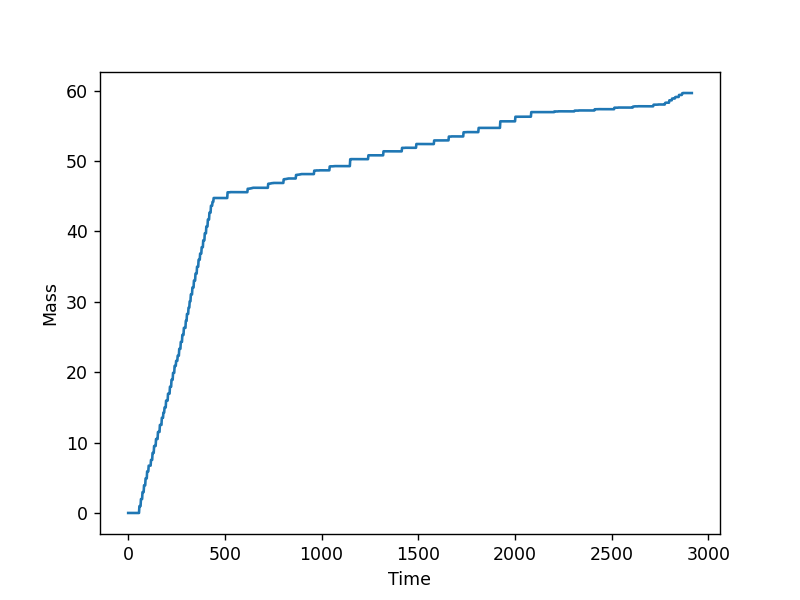

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_250723_S685-690.csv')